<a href="https://colab.research.google.com/github/selva1826/Customer-Churn-Prediction-using-eXplainable-AI-XAI-Tool/blob/main/customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Churn Prediction Using eXplainable AI (XAI) tool**

In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [48]:
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [49]:
df.dropna()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Understanding Data with pandas profiling

In [50]:
!pip install ydata_profiling
!pip install --upgrade scikit-learn==1.3.1

In [51]:
!pip install lime

In [52]:
from ydata_profiling import ProfileReport

In [53]:
profile = ProfileReport(df, title = "Report")

In [54]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Making the data suitable for ML

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [56]:
bin_val = ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'PaperlessBilling',
  'Churn']


In [57]:
cat_val = ['MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaymentMethod',
  'TotalCharges']

In [58]:
for bin in bin_val:
  df[bin]= LabelEncoder().fit_transform(df[bin])
for cat in cat_val:
  df[cat]= LabelEncoder().fit_transform(df[cat])

In [59]:
df.drop("customerID", axis = 1 , inplace = True)

In [60]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [61]:
df.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2       -1.160323     -0.398608      0  
1                 0              3       -0.259629     -0.948762      0  
2                 1              3       -0.362660     -1.641883      1  
3                 0              0       -0.746535     -0.983710      0  
4                 1              2        0.197365     -1.235224      1

# Training the model with **XGBoost**

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [63]:
x = df.drop('Churn', axis =1)
y = df['Churn']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [65]:
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

In [66]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [67]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1] #roc acuracy

In [68]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print('\n')
print("\nClassification Report : ", classification_report(y_test, y_pred))
print("\nROC AUC Score : ", roc_auc_score(y_test, y_prob))

Accuracy :  0.8034066713981547



Classification Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409


ROC AUC Score :  0.8545032968625463


# **Increasing the Accuracy of the Model by training with GridsearchCV**

In [69]:
from sklearn.model_selection import GridSearchCV

# hyperparameter grid defining step
param_grid = {
     'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}


# Performing Grid Search
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5
)

grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]


# Evaluating the optimized model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Tuned Model Accuracy: 0.8126330731014905
Tuned ROC-AUC Score: 0.8633095945428384


# Advanced metrics to check the models confident and its prediction

---



In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

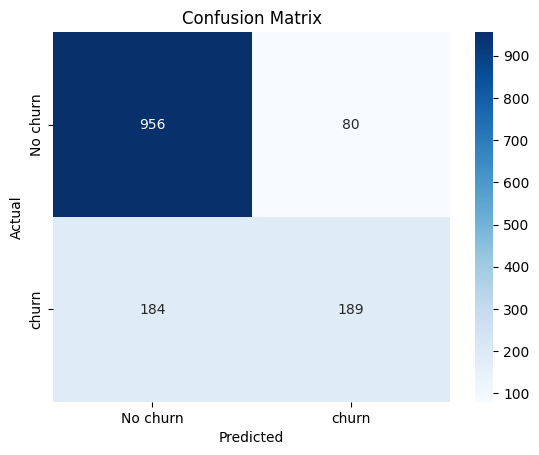

In [71]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", xticklabels= ['No churn', 'churn'], yticklabels = ['No churn', 'churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

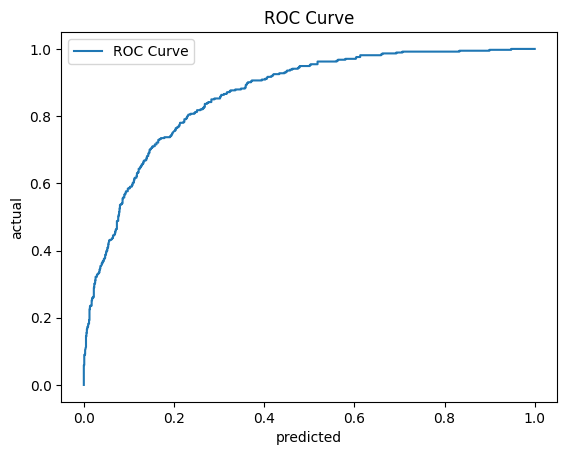

In [72]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Explainability with XAI (SHAP & LIME)

In [73]:
import shap
import lime
import lime.lime_tabular

### Important feature affecting *churn*

In [74]:
explainer = shap.Explainer(best_model)
shap_values = explainer(x_test)

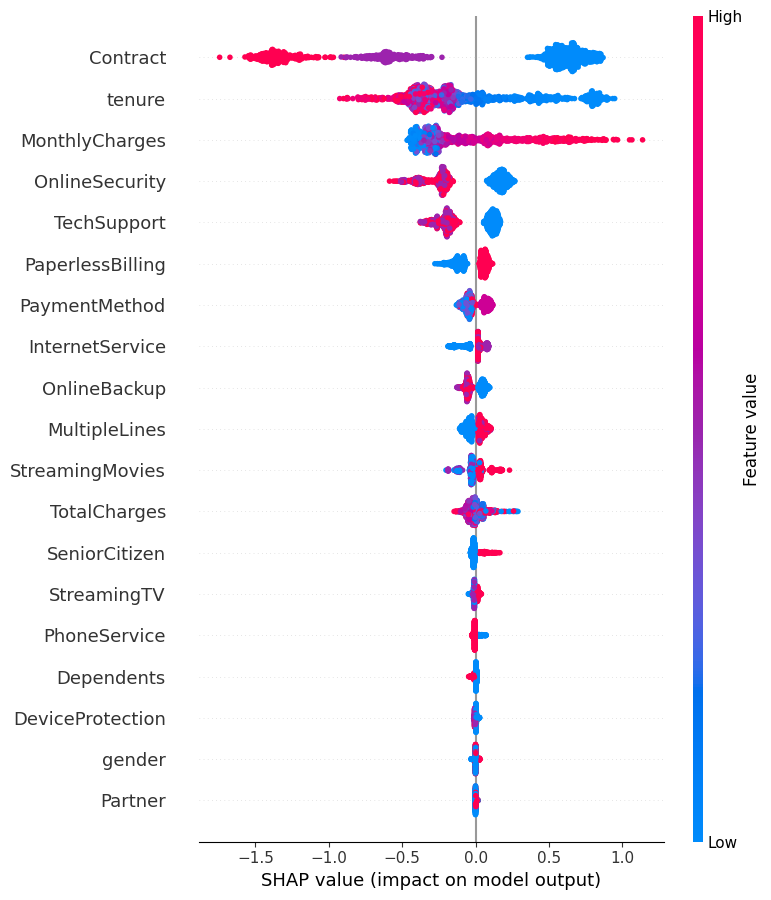

In [75]:
shap.summary_plot(shap_values, x_test)

### understanding y the specific customer churned or Not churned

In [76]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = x_train.values,
    feature_names = x_train.columns,
    class_names = ['No churn', 'churn'],
    mode = 'classification'
)

# **you can check for individual customer churns prediction**

In [77]:
cus_idx = int(input("Enter any customer index number :"))

Enter any customer index number :489


In [81]:
print("The customer : ", cus_idx, "'s churn Prediction is\n\n")
exp = explainer.explain_instance(x_test.iloc[cus_idx].values, best_model.predict_proba)
exp.show_in_notebook()

The customer :  489 's churn Prediction is




# **The end of this Notebook**